In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=False)

#put the path to the directory with .csv files and 'images' folder on your google drive
datapath = '/content/drive/My Drive/ai-side-projects/kitchenware_classification/'

Mounted at /content/drive/


# Loading data

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')


In [3]:
train_labels = pd.read_csv(datapath + '/data/train.csv', index_col=0)


In [4]:
list_ds = tf.data.Dataset.list_files(datapath+'data/images/*.jpg')



def parse_image(filename):
  filename_jpg = tf.strings.split(filename, os.sep)[-1]
  id = tf.strings.split(filename_jpg, '.')[0]
  try:
    id = int(id)
    label = train_labels.loc[int(id)].values[0]
  except:
    label = 'TRAIN'

  #label = tf.convert_to_tensor(label)

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label


images_ds = list_ds.map(parse_image)

#images_ds = images_ds.filter(lambda x, y: y != 'TRAIN SET')



In [43]:
for a in list_ds.take(2):
  filename = a

In [45]:
filename

<tf.Tensor: shape=(), dtype=string, numpy=b'/content/drive/My Drive/ai-side-projects/kitchenware_classification/data/images/5076.jpg'>

In [46]:
filename_jpg = tf.strings.split(filename, os.sep)[-1]
id = tf.strings.split(filename_jpg, '.')[0]
try:
  id = int(id)
  label = train_labels.loc[int(id)].values[0]
except:
  label = 'TRAIN'



In [47]:
label

'plate'

In [48]:
tf.convert_to_tensor(label)

<tf.Tensor: shape=(), dtype=string, numpy=b'plate'>

In [ ]:
for image, label in images_ds.filter(lambda x, y: y != 'TRAIN').take(2):
  show(image, label)

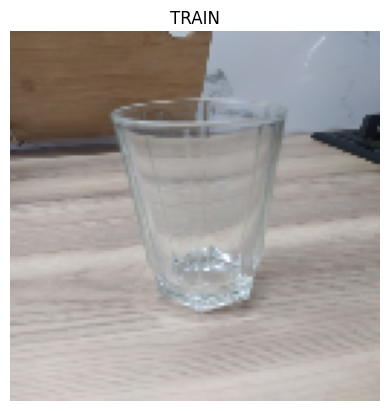

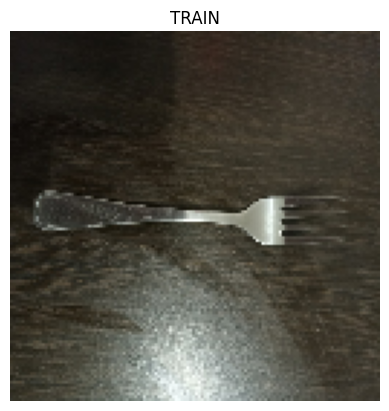

In [5]:
for image, label in images_ds.take(2):
  show(image, label)